<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/web_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Importing Dataset**

In [3]:
df = pd.read_csv('/content/train_1.csv')

In [4]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
#Transforming data from wide to long format
df_1 = pd.melt(df, id_vars=['Page'], var_name='Date', value_name='Views')
df_1.head()

,Page,Date,Views
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [6]:
# Creating a dataframe using the date and views columns
df2 = pd.DataFrame(df_1, columns=['Date', 'Views'])

In [7]:
df2.head()

,Date,Views
0,2015-07-01,18.0
1,2015-07-01,11.0
2,2015-07-01,1.0
3,2015-07-01,35.0
4,2015-07-01,NaN


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79784650 entries, 0 to 79784649
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Views   float64
dtypes: float64(1), object(1)
memory usage: 1.2+ GB


In [10]:
df2.isnull().sum()

,0
Date,0
Views,6192931


In [11]:
# Using interpolation to fill in missing values in views colum
df2['Views'] = df2['Views'].interpolate(method='linear')

In [12]:
df2.isnull().sum()

,0
Date,0
Views,0


In [13]:
df2

,Date,Views
0,2015-07-01,18.0
1,2015-07-01,11.0
2,2015-07-01,1.0
3,2015-07-01,35.0
4,2015-07-01,23.5
...,...,...
79784645,2016-12-31,10.0
79784646,2016-12-31,10.0
79784647,2016-12-31,10.0
79784648,2016-12-31,10.0


In [14]:
# Converting the date column to datetime and making it an index colum with a frequency of MS
df2['Date'] = pd.to_datetime(df2['Date'])



In [16]:
df2.set_index('Date', inplace=True)

In [17]:
df2.head()

,Views
Date,
2015-07-01,18.0
2015-07-01,11.0
2015-07-01,1.0
2015-07-01,35.0
2015-07-01,23.5


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79784650 entries, 2015-07-01 to 2016-12-31
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Views   float64
dtypes: float64(1)
memory usage: 1.2 GB


In [20]:
print(df2.index.freq)

None


In [24]:
df2 = df2.resample('D').sum()
df2

,Views
Date,
2015-07-01,187742741.5
2015-07-02,176087869.0
2015-07-03,166031150.0
2015-07-04,170745247.0
2015-07-05,178315107.0
...,...
2016-12-27,239493127.0
2016-12-28,233467306.5
2016-12-29,240113459.0


In [59]:
df2.isnull().sum()

,0
Views,0


In [60]:
df2 = df2.resample('D').sum().interpolate(method='linear')

In [61]:
df2.asfreq('D')

,Views
Date,
2015-07-01,187742741.5
2015-07-02,176087869.0
2015-07-03,166031150.0
2015-07-04,170745247.0
2015-07-05,178315107.0
...,...
2016-12-27,239493127.0
2016-12-28,233467306.5
2016-12-29,240113459.0


## **Plot the source data**

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Views')]

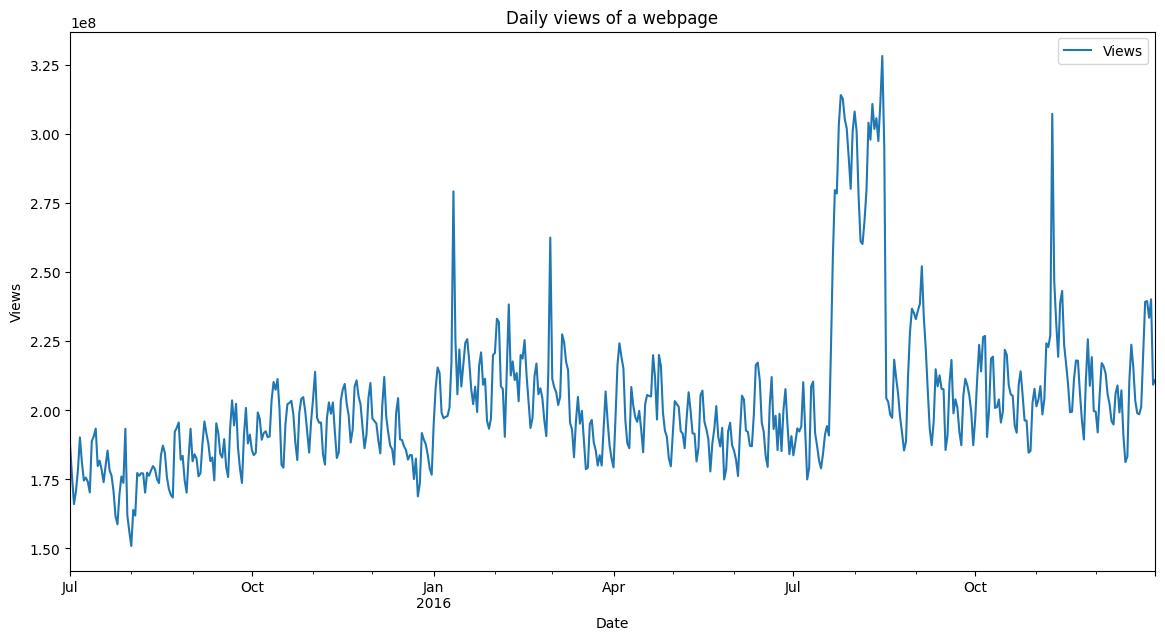

In [62]:
title = 'Daily views of a webpage'
ylabel = 'Views'
xlabel = 'Date'

ax = df2.plot(title=title, figsize=(14, 7))
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

## **Run an ETS Decomposition**

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

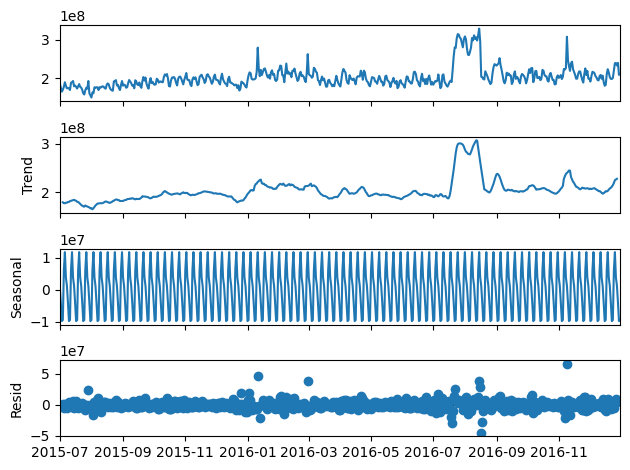

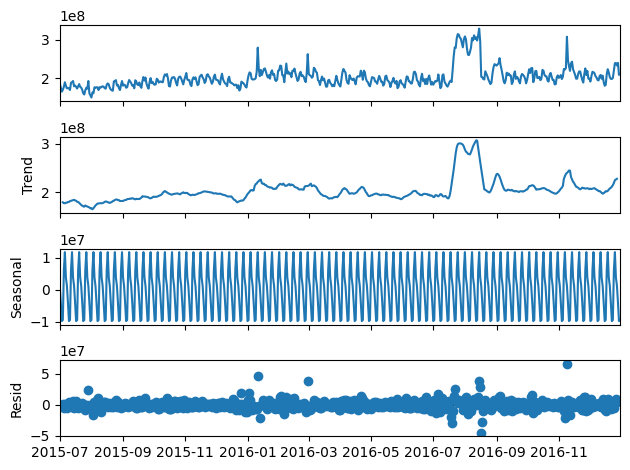

In [64]:
result = seasonal_decompose(df2, model='add')
result.plot()

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.

In [65]:
!pip install pmdarima

In [66]:
from pmdarima import auto_arima

In [67]:
auto_arima(df2, seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  550
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 12)   Log Likelihood               -9724.738
Date:                             Fri, 23 Aug 2024   AIC                          19463.476
Time:                                     20:56:31   BIC                          19493.632
Sample:                                 07-01-2015   HQIC                         19475.261
                                      - 12-31-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2414      0.013     92.053      0.000       1.215       1.268
ar.L2         -0.9641      0.013    -75.697      0.000      -0.989      -0.939
ma.L1         -1.2900      0.015    -86.064      0.000      -1.319      -1.261
ma.L2          0.9625      0.016     59.800      0.000       0.931       0.994
ar.S.L12      -0.1712      0.027     -6.436      0.000      -0.223      -0.119
ar.S.L24       0.0007      0.046      0.016      0.987      -0.090       0.091
sigma2      1.498e+14   5.95e-17   2.52e+30      0.000     1.5e+14     1.5e+14
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):              2941.72
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               3.17   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.51e+45. Standard errors may be unstable.
"""


### Split the data into train/test sets

In [ ]:
len(df2)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Views   550 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [68]:
df2.Views.value_counts()

,count
Views,
187742741.5,1
192307441.0,1
195120583.5,1
184089920.5,1
190628957.5,1
...,...
173541602.5,1
168820333.5,1
182497836.0,1


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Views   550 non-null    float64
dtypes: float64(1)
memory usage: 8.6 KB


In [70]:
# Set half a year for testing
train = df2.iloc[:183]
test = df2.iloc[183:]

In [71]:
print(train.dtypes)

Views    float64
dtype: object


### Fit a SARIMA(2, 1, 2)(2,0,0,12) Model

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [74]:
# Convert relevant columns in 'train' to numeric type
df2['Views']= pd.to_numeric(df2['Views'], errors='coerce')


In [75]:
model = SARIMAX(train, order=(2, 1, 2), seasonal_order = (2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Views   No. Observations:                  183
Model:             SARIMAX(2, 1, 2)x(2, 0, [], 12)   Log Likelihood               -3162.809
Date:                             Fri, 23 Aug 2024   AIC                           6339.617
Time:                                     21:00:40   BIC                           6362.045
Sample:                                 07-01-2015   HQIC                          6348.709
                                      - 12-30-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2330      0.018     69.381      0.000       1.198       1.268
ar.L2         -0.9560      0.017    -55.112      0.000      -0.990      -0.922
ma.L1         -1.2683      0.022    -58.776      0.000      -1.311      -1.226
ma.L2          0.9536      0.022     43.027      0.000       0.910       0.997
ar.S.L12      -0.0940      0.015     -6.244      0.000      -0.124      -0.065
ar.S.L24      -0.0189      0.041     -0.460      0.645      -0.099       0.062
sigma2      4.198e+13   1.67e-16   2.52e+29      0.000     4.2e+13     4.2e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 3.14
Prob(Q):                              0.42   Prob(JB):                         0.21
Heteroskedasticity (H):               0.62   Skew:                            -0.07
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.86e+44. Standard errors may be unstable.
"""

In [76]:
#Obtain predicted values
start = len(train)
end = len(train) + len(test) -1
predictions = results.predict(start=start, end=end, type='levels').rename('SARIMA Predicitons(2, 1, 2)(2, 0, 0, 12)')

In [82]:
#Compare predictions to expected values
for i in range (len(predictions)):
  print(f'predicted={predictions[i]:<11.10}, expected={test["Views"][i]}')

predicted=177700293.9, expected=176662700.5
predicted=178488164.7, expected=194835238.0
predicted=180699029.6, expected=208083579.0
predicted=183537817.8, expected=215450534.5
predicted=183257507.6, expected=213454706.5
predicted=183274424.9, expected=199113469.0
predicted=180410804.3, expected=197100713.5
predicted=177360799.1, expected=197582504.0
predicted=178311953.8, expected=197894293.5
predicted=180224896.2, expected=200931915.0
predicted=182331218.5, expected=217238450.5
predicted=183277985.9, expected=279169169.0
predicted=182370850.3, expected=225519386.5
predicted=180499833.0, expected=205757625.0
predicted=179153021.4, expected=221980946.0
predicted=179330742.6, expected=208553709.5
predicted=180655087.6, expected=216292343.5
predicted=182415498.0, expected=224368356.0
predicted=183074542.9, expected=225707749.5
predicted=182170507.0, expected=217635694.5
predicted=180622834.3, expected=207637981.5
predicted=179434358.1, expected=202179931.0
predicted=179457042.3, expected=

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Views'),
 Text(0.5, 1.0, 'Daily Views of a Webpage')]

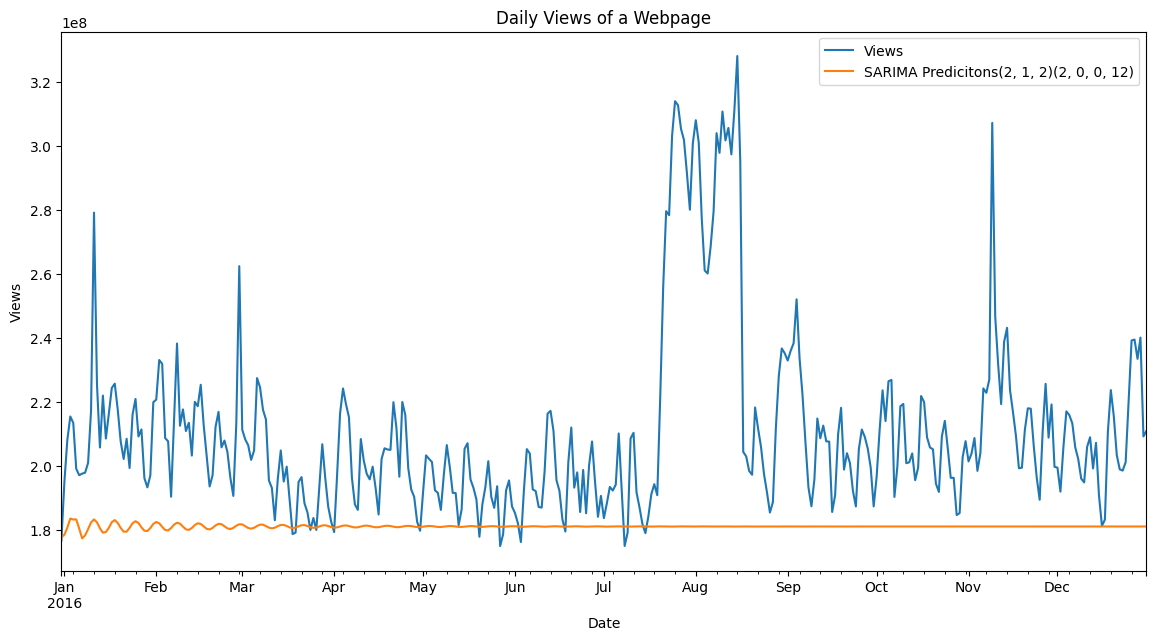

In [83]:
#Plot predictions against known values
title = 'Daily Views of a Webpage'
ylabel = 'Views'
xlabel = 'Date'

ax = test.plot(legend=True, figsize= (14, 7))
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel= xlabel, ylabel=ylabel, title=title)

### Evaluate the Model

In [84]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test, predictions)
print(f'SARIMA MSE Error {error:11.10}')

SARIMA MSE Error 1.705097858e+15


In [89]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test, predictions)
print(f'SARIMA RMSE Error {error:11.10}')

TypeError: unsupported format string passed to numpy.ndarray.__format__

### Retrain the model on the full data, and forecast the future

In [90]:
model = SARIMAX(df2, order=(2, 1, 2), seasonal_order=(2, 0, 0, 12))
results = model.fit()
fcast = results.predict(len(df2), len(df2)+30, type = 'levels').rename('SARIMAX(2, 1, 2)(2, 0, 0, 12)')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Views')]

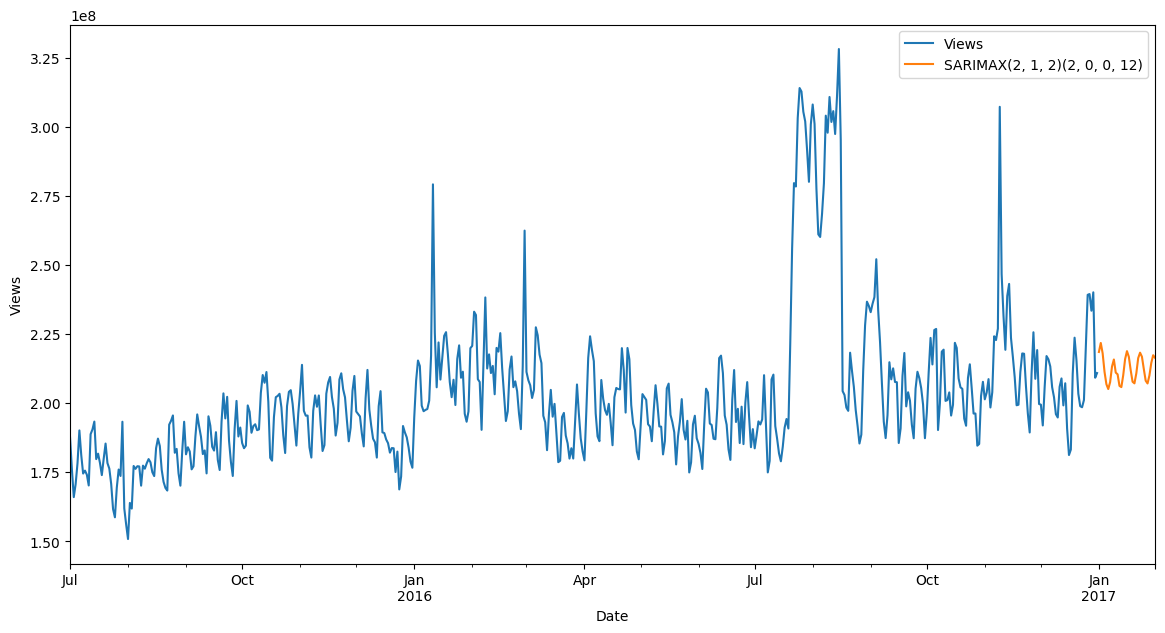

In [91]:
#Plot predictins against known values
title = 'Daily Views of a webpage'
ylabel = 'Views'
xlabel = 'Date'

ax = df2.plot(legend=True, figsize=(14, 7))
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)